In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
#!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [4]:
print(df.shape)

(2772, 5)


In [27]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033


In [6]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [7]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

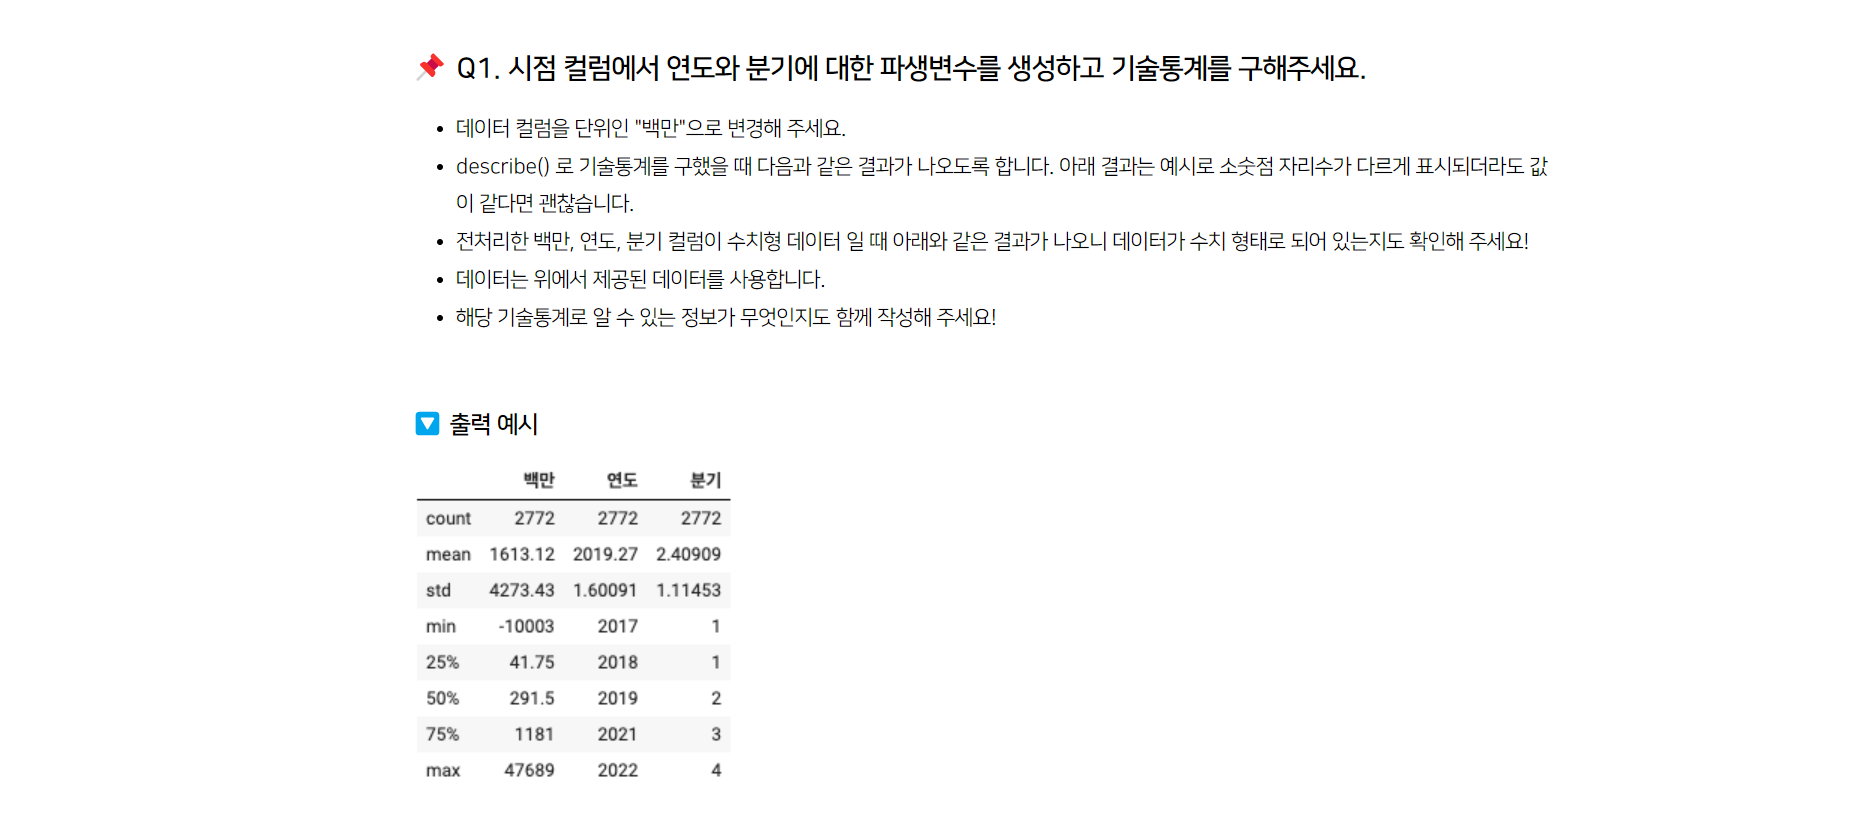

In [25]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')

In [26]:
df['백만'] = df['데이터']

In [35]:
df["시점"].value_counts()

2017.1/4       126
2017.2/4       126
2022.1/4       126
2021.4/4       126
2021.3/4       126
2021.2/4       126
2021.1/4       126
2020.4/4       126
2020.3/4       126
2020.2/4       126
2020.1/4       126
2019.4/4       126
2019.3/4       126
2019.2/4       126
2019.1/4       126
2018.4/4       126
2018.3/4       126
2018.2/4       126
2018.1/4       126
2017.4/4       126
2017.3/4       126
2022.2/4 p)    126
Name: 시점, dtype: int64

In [44]:
df['백만'] = df['데이터']


df['연도'] = df['시점'].str.split('.').str[0].astype(int)
df['분기'] = df['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)

new_df = df[['백만', '연도', '분기']].describe()


new_df['백만'] = new_df['백만']
new_df[['연도', '분기']] = new_df[['연도', '분기']].astype(int)


new_df


,백만,연도,분기
count,2772.000000,2772,2772
mean,1613.116522,2019,2
std,4273.426107,1,1
min,-10003.000000,2017,1
25%,41.750000,2018,1
50%,291.500000,2019,2
75%,1181.000000,2021,3
max,47689.000000,2022,4


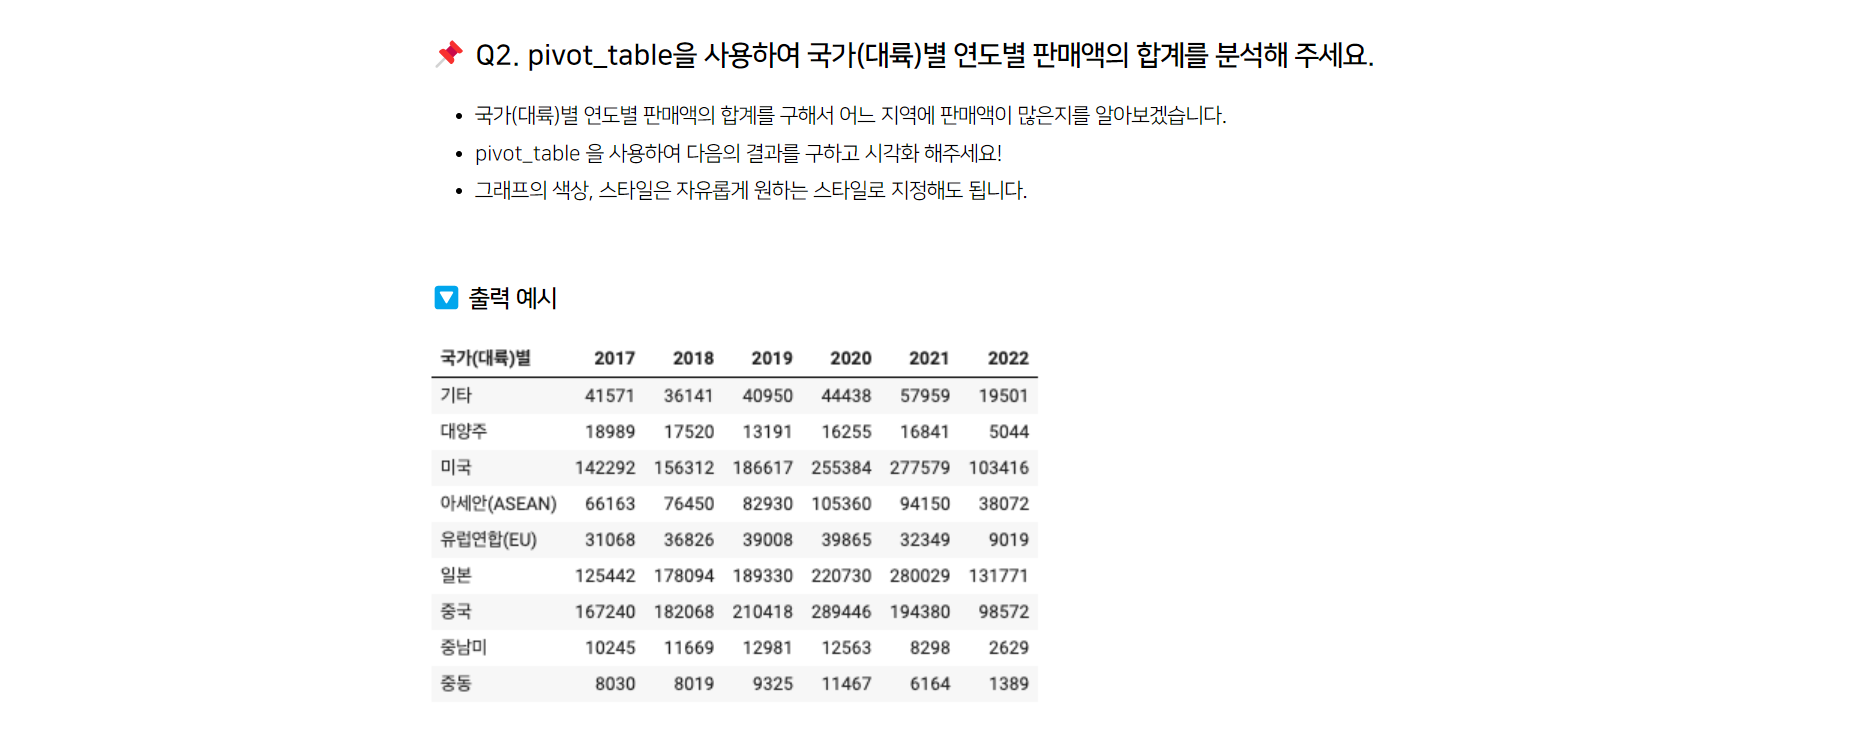

In [47]:
pivot_df = df.pivot_table(values='백만', index='국가(대륙)별', columns='연도', aggfunc='sum')

pivot_df

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


In [58]:
# 사용 가능한 모든 colormap 리스트 출력
colormaps = plt.colormaps()
print(colormaps)


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

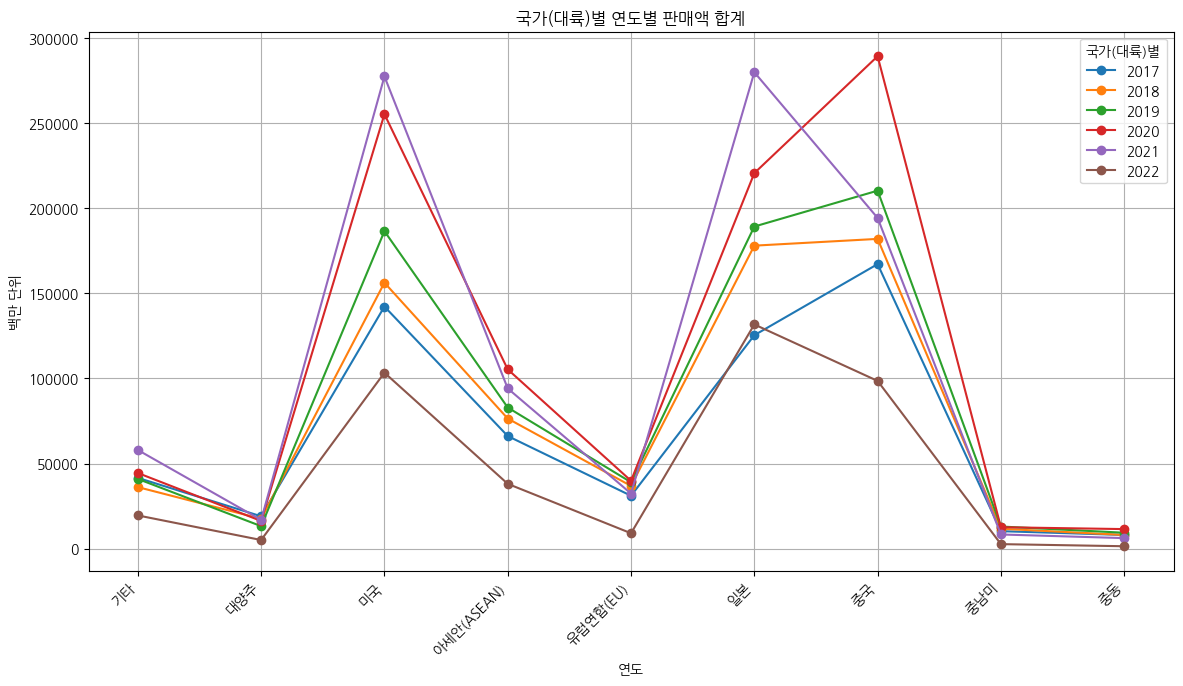

In [56]:
# Line Plot
pivot_df.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.ylabel('백만 단위')
plt.xlabel('연도')
plt.xticks(rotation=45, ha='right')
plt.legend(title='국가(대륙)별')
plt.grid(True)


plt.show()


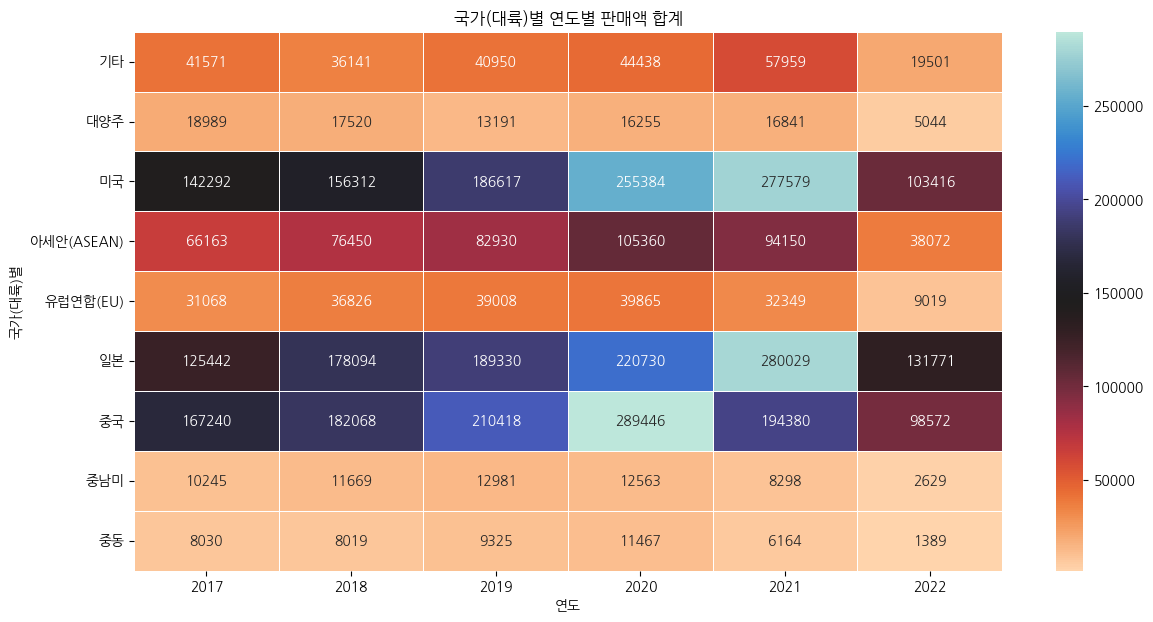

In [59]:
# Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='icefire_r', linewidths=.5)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.ylabel('국가(대륙)별')
plt.xlabel('연도')

plt.show()


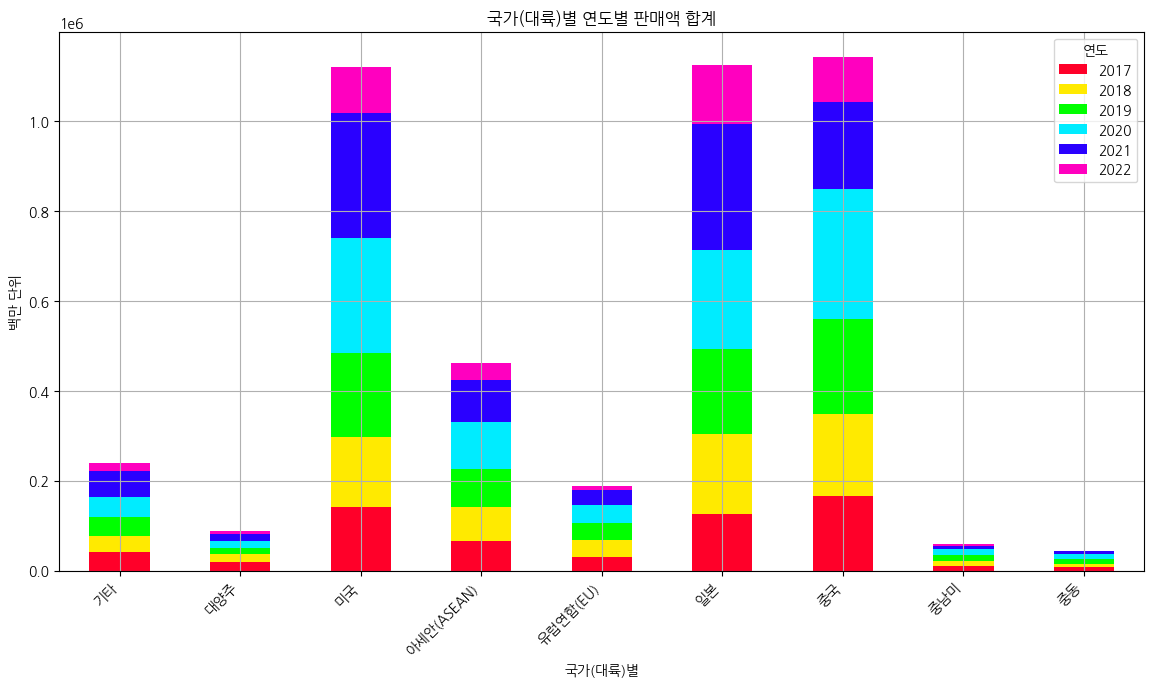

In [55]:
# Stacked Bar Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='gist_rainbow')
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.ylabel('백만 단위')
plt.xlabel('국가(대륙)별')
plt.xticks(rotation=45, ha='right')
plt.legend(title='연도')
plt.grid(True)

plt.show()


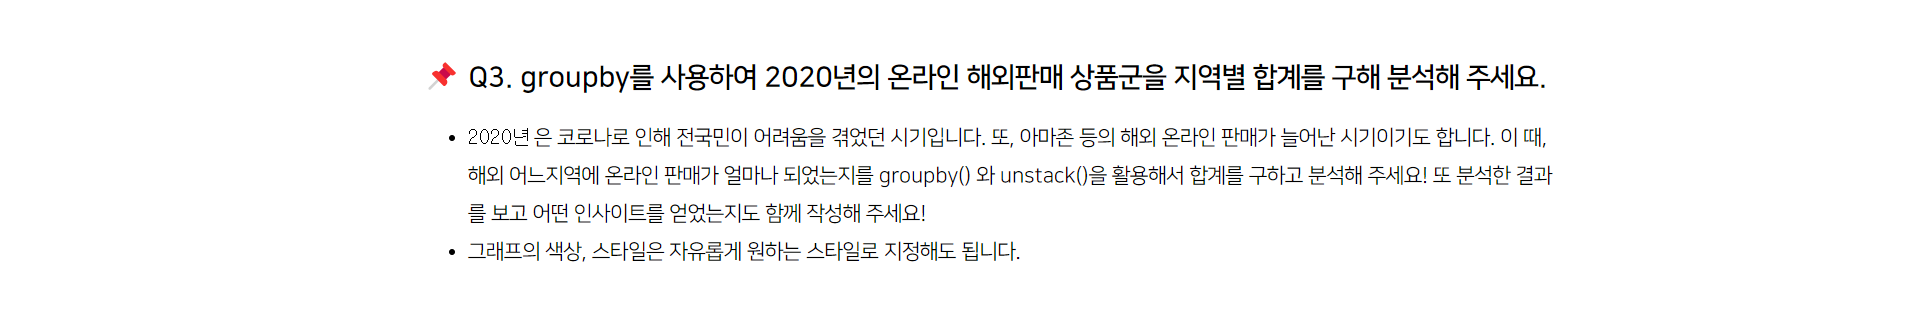

In [60]:
df_2020 = df[df['연도'] == 2020]

# 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요!
grouped_df = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()

grouped_df


상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


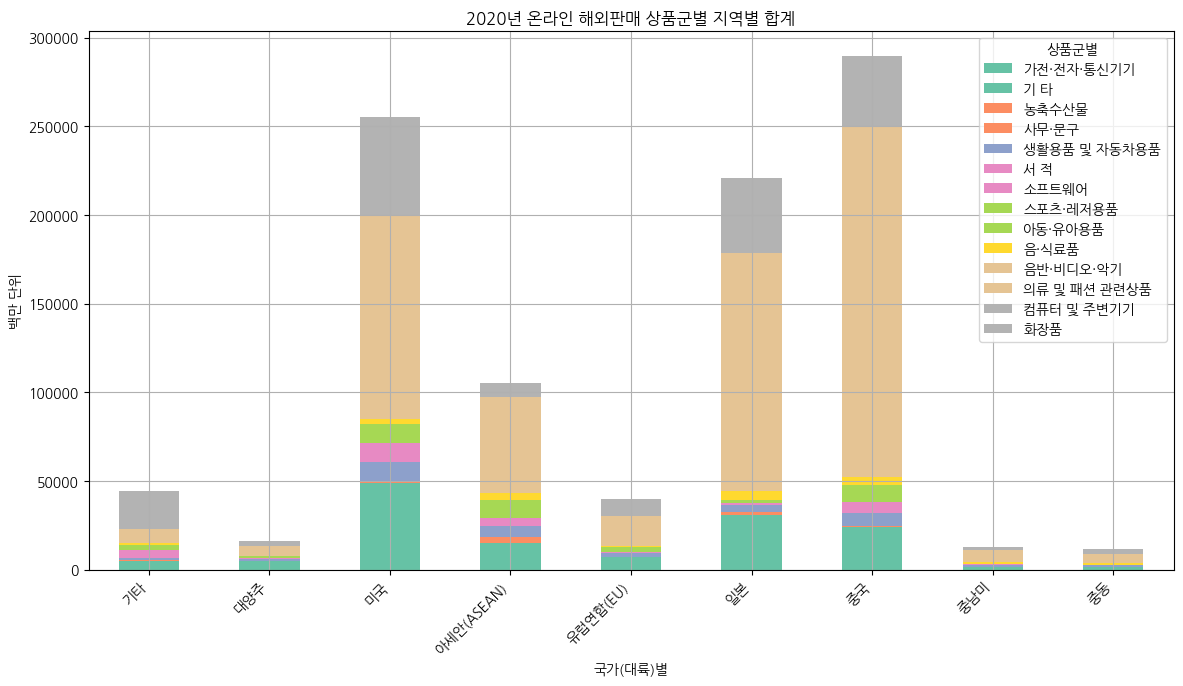

In [61]:

grouped_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title('2020년 온라인 해외판매 상품군별 지역별 합계')
plt.ylabel('백만 단위')
plt.xlabel('국가(대륙)별')
plt.xticks(rotation=45, ha='right')
plt.legend(title='상품군별')
plt.grid(True)


plt.show()


In [ ]:
# 중국과 미국에 온라인 판매를 많이했구나... 특히 음반 부문에서 많이 했구나..

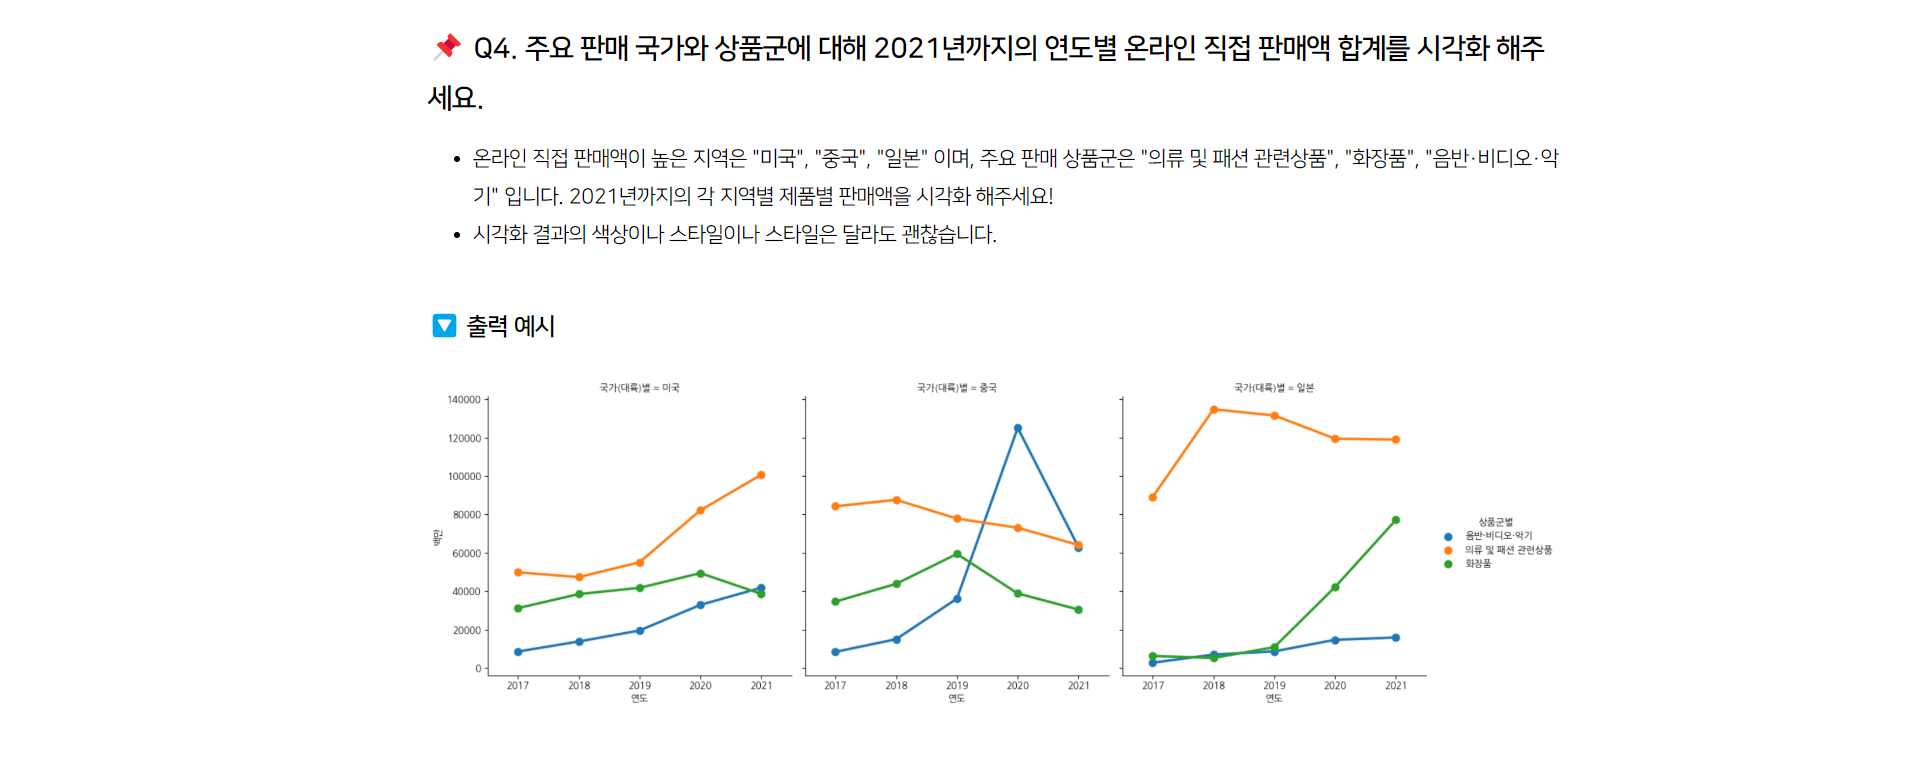

In [63]:
#온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며
countries = ["미국", "중국", "일본"]

#주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 
categories = ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]

#2021년까지의 각 지역별 /제품별 / 판매액을 구함
df_filtered = df[(df['연도'] <= 2021) & (df['국가(대륙)별'].isin(countries)) & (df['상품군별'].isin(categories))]

grouped_df = df_filtered.groupby(['국가(대륙)별', '연도', '상품군별'])['백만'].sum().unstack('상품군별')

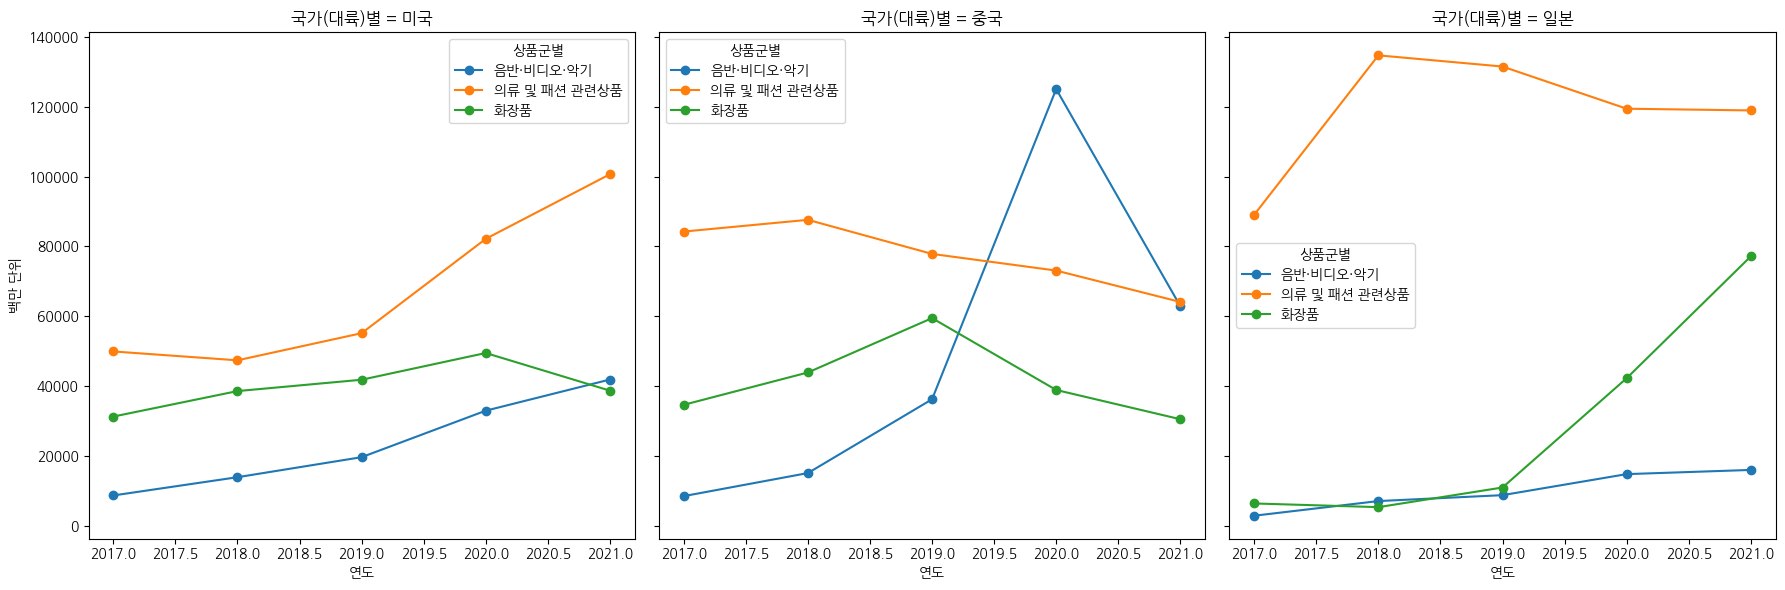

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


for i, country in enumerate(countries):
    ax = axes[i]
    grouped_df.loc[country].plot(kind='line', marker='o', ax=ax)
    ax.set_title(f'국가(대륙)별 = {country}')
    ax.set_ylabel('백만 단위')
    ax.set_xlabel('연도')
    ax.legend(title='상품군별')


plt.tight_layout()
plt.show()

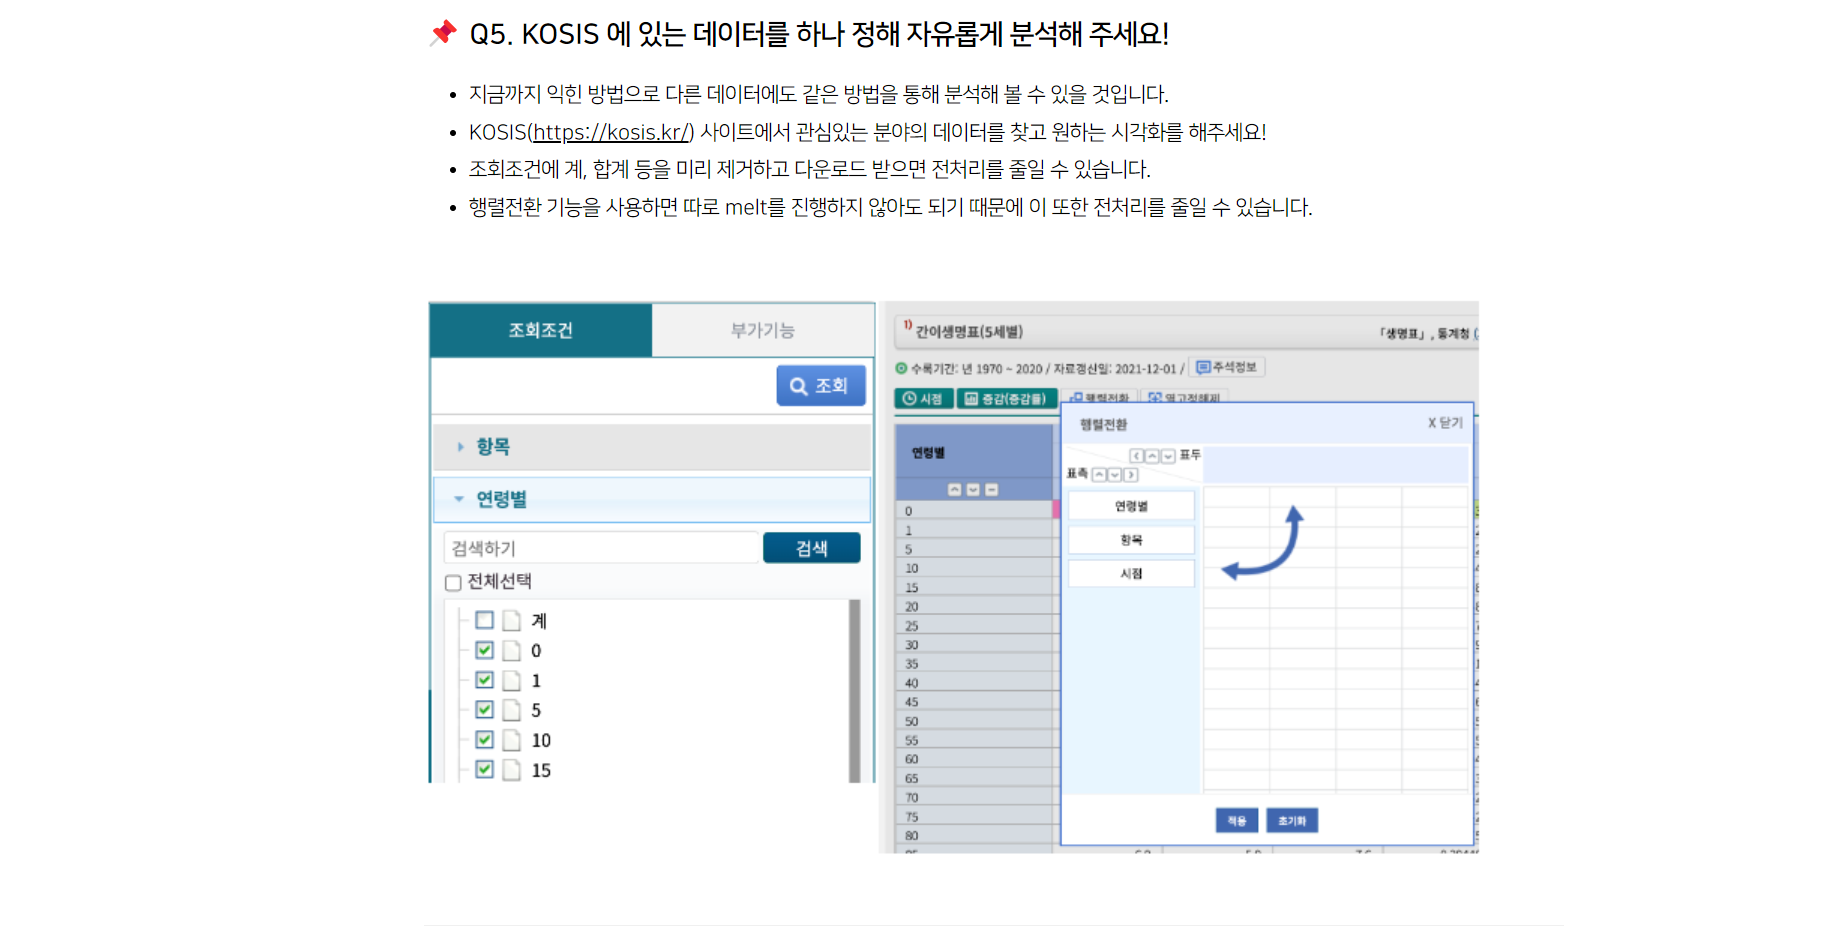

In [78]:
df2 = pd.read_csv('././data/톤급별_선박입항현황_20240825180403.csv', encoding='utf-8')
df2

,시점,외항연안별(1),구분별(1),항목,부산,부산.1,부산.2,부산.3,인천,인천.1,인천.2,인천.3,평택・당진,평택・당진.1,평택・당진.2,평택・당진.3,경인항,경인항.1,경인항.2,경인항.3
0,시점,외항연안별(1),구분별(1),항목,100톤미만,100 - 500톤미만,500 - 1000톤미만,1000 - 3000톤미만,100톤미만,100 - 500톤미만,500 - 1000톤미만,1000 - 3000톤미만,100톤미만,100 - 500톤미만,500 - 1000톤미만,1000 - 3000톤미만,100톤미만,100 - 500톤미만,500 - 1000톤미만,1000 - 3000톤미만
1,2024.06,외항선,국적선,척수 (척),0,82,7,41,0,0,0,2,0,0,0,10,0,0,0,0
2,2024.06,외항선,국적선,총톤수 (GT),0,39441,6175,69191,0,0,0,4742,0,0,0,19625,0,0,0,0
3,2024.06,외항선,외국선,척수 (척),0,17,25,115,0,0,0,36,0,0,0,54,1,0,0,0
4,2024.06,외항선,외국선,총톤수 (GT),0,6698,18772,232731,0,0,0,80638,0,0,0,114436,16,0,0,0
5,2024.06,연안선,연안선,척수 (척),355,775,204,169,43,347,26,64,17,139,4,58,0,9,21,2
6,2024.06,연안선,연안선,총톤수 (GT),118753,375312,156716,286326,22823,405475,20928,129595,16753,118628,2996,129045,0,6421,19474,5352


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        7 non-null      object
 1   외항연안별(1)  7 non-null      object
 2   구분별(1)    7 non-null      object
 3   항목        7 non-null      object
 4   부산        7 non-null      object
 5   부산.1      7 non-null      object
 6   부산.2      7 non-null      object
 7   부산.3      7 non-null      object
 8   인천        7 non-null      object
 9   인천.1      7 non-null      object
 10  인천.2      7 non-null      object
 11  인천.3      7 non-null      object
 12  평택・당진     7 non-null      object
 13  평택・당진.1   7 non-null      object
 14  평택・당진.2   7 non-null      object
 15  평택・당진.3   7 non-null      object
 16  경인항       7 non-null      object
 17  경인항.1     7 non-null      object
 18  경인항.2     7 non-null      object
 19  경인항.3     7 non-null      object
dtypes: object(20)
memory usage: 1.2+ KB


In [109]:
# '척수 (척)' 항목에 대한 데이터를 필터링
df_tonnage = df2[df2['항목'] == '척수 (척)']

In [110]:
# 숫자 데이터로 변환 
df_tonnage_numeric = df_tonnage.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

In [112]:
# 각 항구별 척수 평균 계산
tonnage_mean = df_tonnage_numeric.mean()

tonnage_mean_df = pd.DataFrame(tonnage_mean, columns=['평균 척수'])

tonnage_mean_df

,평균 척수
부산,118.333333
부산.1,291.333333
부산.2,78.666667
부산.3,108.333333
인천,14.333333
인천.1,115.666667
인천.2,8.666667
인천.3,34.000000
평택・당진,5.666667
평택・당진.1,46.333333


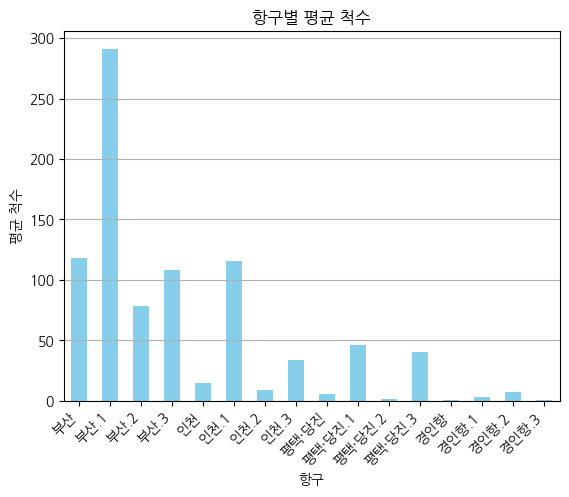

In [115]:
tonnage_mean_df.plot(kind='bar', legend=False, title='항구별 평균 척수', color='skyblue')
plt.xlabel('항구')
plt.ylabel('평균 척수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()
